# 군집 분석 - 병합 군집, Hierarchical Clustering 
---
* 주어진 데이터를 순차적으로 가까운 값들끼리 묶어 주는 병합방법을 사용한다.  
* 비슷한 군집끼리 묶어 가면서 최종 적으로는 하나의 케이스가 될때까지 군집을 묶는 클러스터링 알고리즘이다.
* 계층적 군집 분석은 Dendrogram이라는 그래프를 이용하면 손쉽게 시각화 할 수 있다.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

###  Iris 데이터 셋을 사용

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


# 사이킷런에서 병합 군집 적용

클러스터를 측정하는 방법을 지정한다. 

* ward : 기본값. 클러스터 내의 분산을 가장 작게 증가 시키는 두 클러스터를 합친다. 비교적 비슷한 클러스터가 생성된다.
* average : 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합친다.
* complete : 최대 연결법이라고도 한다. 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합친다.

In [3]:
from sklearn.cluster import AgglomerativeClustering
# setting distance_threshold=0 ensures we compute the full tree.
ac = AgglomerativeClustering(n_clusters=None, distance_threshold=0,compute_full_tree=True,
                             affinity='euclidean', 
                             linkage='ward')


labels = ac.fit_predict(X)
print('클러스터 레이블: %s' % labels)

클러스터 레이블: [147 131 115 136 143  85  92 148 137 146 144  97 123  84 105 107 132 114
 101 142  98  89 119 120 135 117 118  67  77 141  76 138  82  78 108 129
  75 111 112 140 128  91  94 106 121  99 116  48  81 126 104 103  71  59
 109  90 139  69  44  93  95 145  86 130 127  64 122  96  52 110  47  73
  70  79  58  57 149 124  55 133  34 113 134  42  83 125  88  63  60  45
  40  41  51 102  61  66 100  53  65  62  80  74  28  49  39  50  20  24
  38  68  56  29  30  46  23  36  33  16  54  19  27  37  22  31  87   9
  43  32  72  35  14  21  26  17  25  18  13  11  15  10  12   5   8   4
   6   7   3   2   1   0]


In [4]:
# scipy를 사용하여 생성된 병합군집의 결과를 수형도(dendrogram)로 그린다.

def plot_dendrogram(model):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix)

In [5]:
model = ac.fit(X)

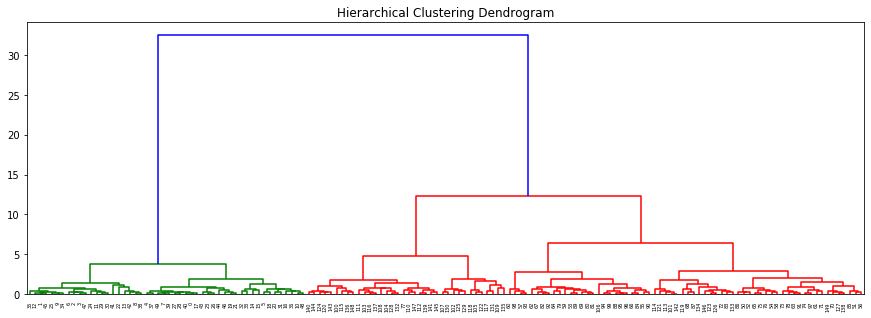

In [6]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model)

plt.show()